# **Ejercicios de pair programming Módulo 3 Sprint 1**
## **Regresión lineal: Lección 1**
### **Machine Learning: Introducción**

---

Empezamos una nueva lección, y este es el momento de poner en práctica los conocimientos adquiridos sobre la Regresión Lineal Simple I. Para ello os vamos a pedir que por vuestra cuenta busqueis un dataset que os guste, por ejemplo de Kaggle o de donde queráis extraerlo. De forma que vamos a probar a realizar ajustes lineales con el fin de predecir alguna de sus variables. Este dataset será el que iremos usando a lo largo de todas las sesiones de pairprogramming de regresión lineal.

Se ruega a la hora de realizar la entrega que incluyais el conjunto de datos que hayais decidido emplear para estos ejercicios.


In [1]:
# tratamiento de los datos
# ============================================
import pandas as pd
import numpy as np

# librerías para la visualización de los datos
# ============================================
import matplotlib.pyplot as plt
import seaborn as sns

# Establecer tamaño fijo de gráficas
# ==================================
plt.rcParams["figure.figsize"] = (10,8)

# Configuración warnings
# ======================
import warnings
warnings.filterwarnings('ignore')

import os

pd.options.display.max_columns = None


**Objetivos**

1. Buscar un conjunto de datos a analizar:
- Es necesario que el conjunto de datos a analizar tenga variables numéricas y categóricas, primando que haya más de una variable de tipo numérico. Ya que tambien se utilizarán serán útiles a la hora de realizar predicciones en las clases de regresión lineal múltiple. Así mismo se recomienda que los datasets esten ligeramente limpios para facilitar los análisis.


In [2]:
os.getcwd()

'/mnt/c/Users/lidya/Documents/Nuestros documentos/Documentos de Lidya/Estudios/Adalab/modulos/modulo3/pair_programming/promo-d-da-modulo3-sprint1-elisa-lidya/regresion-lineal'

In [3]:
df_socio = pd.read_csv("../datos/soci_econ_country_profiles.csv", index_col=0)
df_socio.tail()

,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),Economy: Industry (% of GVA),Economy: Services and other activity (% of GVA),Employment: Agriculture (% of employed),Employment: Industry (% of employed),Employment: Services (% of employed),Unemployment (% of labour force),Labour force participation (female/male pop. %),Agricultural production index (2004-2006=100),Food production index (2004-2006=100),International trade: Exports (million US$),International trade: Imports (million US$),International trade: Balance (million US$),"Balance of payments, current account (million US$)",Population growth rate (average annual %),Urban population (% of total population)_x,Urban population growth rate (average annual %),"Fertility rate, total (live births per woman)","Population age distribution (0-14 / 60+ years, %)",International migrant stock (000/% of total pop.),Refugees and others of concern to UNHCR (in thousands),Infant mortality rate (per 1000 live births,Health: Total expenditure (% of GDP),Health: Physicians (per 1000 pop.),Education: Government expenditure (% of GDP),Education: Primary gross enrol. ratio (f/m per 100 pop.),Education: Secondary gross enrol. ratio (f/m per 100 pop.),Education: Tertiary gross enrol. ratio (f/m per 100 pop.),Seats held by women in national parliaments %,Mobile-cellular subscriptions (per 100 inhabitants),Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI),Quality Of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living,Property price to income ratio,Traffic commute time index,Pollution index,Climate index,Gross Rental Yield City Center,Gross Rental Yield Outside Center,Property Price to Rent Ratio City Center,Property Price to Rent Ratio Outside Center,Mortgate as percentage of income,Affordability Index,Cost Of Living Index,Rent Index,Cost Of Living Plus Rent Index,Grocery Index,Restaurant Price Index,Local Purchasing Power Index,Access to electricity (% of population),Adjusted net national income per capita (constant 2010 US$),Age dependency ratio (% of working-age population),"Air transport, freight (million ton-km)","Air transport, passengers carried",Commercial service exports (current US$),Commercial service imports (current US$),Consumer price index (2010 = 100),Current account balance (% of GDP),Current health expenditure (% of GDP),Exports of goods and services (% of GDP),Gross domestic savings (% of GDP),High-technology exports (current US$),Human capital index (HCI) (scale 0-1),Imports of goods and services (% of GDP),"Inflation, consumer prices (annual %)","Life expectancy at birth, female (years)","Life expectancy at birth, male (years)","Life expectancy at birth, total (years)",Military expenditure (% of GDP),"Population, female","Population, male",Tax revenue (% of GDP),"Taxes on income, profits and capital gains (% of revenue)",Urban population (% of total population)_y
61,United Arab Emirates,WesternAsia,83600,9400,112.4,262.4,370296,3.8,40438.8,0.7,44.9,54.4,3.5,21.1,75.4,3.7,41.7/90.8,70,70,195613,201908,-6296,-99,2.0,85.5,2.9,1.8,13.9/2.4,8095.1/88.4,1.3,6.2,3.6,1.6,-99,116.0/116.7,-99,-99,20.0,187.4,91.2,56,3.8,211.4/23.2,8642,366,99.6/100.0,98.0/95.2,-99,-99,139.27,116.77,79.34,60.49,67.98,5.60,35.05,58.52,8.86,9.70,10.65,10.30,9.39,42.07,2.38,67.98,68.84,68.39,55.36,63.92,116.77,100.0,37929.274360,

In [4]:
df_socio.columns

Index(['country', 'Region', 'Surface area (km2)',
       'Population in thousands (2017)', 'Population density (per km2, 2017)',
       'Sex ratio (m per 100 f, 2017)',
       'GDP: Gross domestic product (million current US$)',
       'GDP growth rate (annual %, const. 2005 prices)',
       'GDP per capita (current US$)', 'Economy: Agriculture (% of GVA)',
       'Economy: Industry (% of GVA)',
       'Economy: Services and other activity (% of GVA)',
       'Employment: Agriculture (% of employed)',
       'Employment: Industry (% of employed)',
       'Employment: Services (% of employed)',
       'Unemployment (% of labour force)',
       'Labour force participation (female/male pop. %)',
       'Agricultural production index (2004-2006=100)',
       'Food production index (2004-2006=100)',
       'International trade: Exports (million US$)',
       'International trade: Imports (million US$)',
       'International trade: Balance (million US$)',
       'Balance of payments, curren

In [21]:
df_socio = df_socio.filter(['country','Population in thousands (2017)', 'Population density (per km2, 2017)', 'Urban population (% of total population)_y','GDP per capita (current US$)', 'Health: Total expenditure (% of GDP)', 'Current health expenditure (% of GDP)', 'Health Care Index', 'Health: Physicians (per 1000 pop.)', 'Quality Of Life Index', 'Purchasing Power Index', 'Safety Index',  'Pop. using improved drinking water (urban/rural, %)', 'CO2 emission estimates (million tons/tons per capita)','Life expectancy at birth, total (years)'])
df_socio.set_index('country')
df_socio.head(5)

,country,"Population density (per km2, 2017)",Urban population (% of total population)_y,GDP per capita (current US$),Health: Total expenditure (% of GDP),Current health expenditure (% of GDP),Health Care Index,Health: Physicians (per 1000 pop.),Quality Of Life Index,Purchasing Power Index,Safety Index,"Pop. using improved drinking water (urban/rural, %)",CO2 emission estimates (million tons/tons per capita),"Life expectancy at birth, total (years)"
0,Argentina,16.2,91.749,14564.5,4.8,9.124315,73.30,3.8,139.59,58.40,37.37,96.2/98.3,3167,76.372000
1,Australia,3.2,85.904,51352.2,9.4,9.205948,74.25,3.4,176.54,101.94,57.58,100.0/100.0,15282,82.500000
2,Austria,106.0,58.094,44117.7,11.2,10.396617,80.91,5.2,190.37,95.66,80.75,100.0/100.0,505,81.643902
3,Belarus,46.7,78.134,5750.8,5.7,5.925786,53.76,4.1,119.23,36.43,77.74,94.1/95.2,155,74.129268
4,Belgium,377.5,97.961,40277.8,10.6,10.338669,78.92,3.0,160.52,91.02,55.49,99.5/99.4,520,81.492683


2. Explicar los datos y las variables disponibles en el conjunto de datos seleccionado:
- Esto se hace para que comprendais mejor los datos con los que estais trabajando.
- Realizar un EDA sencillo para la variable dependiente y la variable independiente.

In [6]:
df_socio.shape

(66, 16)

In [7]:
df_socio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66 entries, 0 to 65
Data columns (total 16 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   country                                                     66 non-null     object 
 1   Population in thousands (2017)                              66 non-null     int64  
 2   Population density (per km2, 2017)                          66 non-null     float64
 3   Urban population (% of total population)_y                  66 non-null     float64
 4   GDP per capita (current US$)                                66 non-null     float64
 5   Health: Total expenditure (% of GDP)                        66 non-null     float64
 6   Current health expenditure (% of GDP)                       65 non-null     float64
 7   Health Care Index                                           66 non-null     float64
 8   He

In [8]:
df_socio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66 entries, 0 to 65
Data columns (total 16 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   country                                                     66 non-null     object 
 1   Population in thousands (2017)                              66 non-null     int64  
 2   Population density (per km2, 2017)                          66 non-null     float64
 3   Urban population (% of total population)_y                  66 non-null     float64
 4   GDP per capita (current US$)                                66 non-null     float64
 5   Health: Total expenditure (% of GDP)                        66 non-null     float64
 6   Current health expenditure (% of GDP)                       65 non-null     float64
 7   Health Care Index                                           66 non-null     float64
 8   He

In [9]:
df_socio.isnull().sum()

country                                                       0
Population in thousands (2017)                                0
Population density (per km2, 2017)                            0
Urban population (% of total population)_y                    0
GDP per capita (current US$)                                  0
Health: Total expenditure (% of GDP)                          0
Current health expenditure (% of GDP)                         1
Health Care Index                                             0
Health: Physicians (per 1000 pop.)                            0
Quality Of Life Index                                         0
Purchasing Power Index                                        0
Safety Index                                                  0
Pop. using improved drinking water (urban/rural, %)           0
Pop. using improved sanitation facilities (urban/rural, %)    0
CO2 emission estimates (million tons/tons per capita)         0
Life expectancy at birth, total (years) 

In [10]:
df_socio.duplicated().sum()

0

In [11]:
df_socio["Health: Physicians (per 1000 pop.)"] = pd.to_numeric(df_socio["Health: Physicians (per 1000 pop.)"], errors = 'coerce')

In [12]:
df_socio.head(50)

,country,Population in thousands (2017),"Population density (per km2, 2017)",Urban population (% of total population)_y,GDP per capita (current US$),Health: Total expenditure (% of GDP),Current health expenditure (% of GDP),Health Care Index,Health: Physicians (per 1000 pop.),Quality Of Life Index,Purchasing Power Index,Safety Index,"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",CO2 emission estimates (million tons/tons per capita),"Life expectancy at birth, total (years)"
0,Argentina,44271,16.2,91.749,14564.5,4.8,9.124315,73.30,3.8,139.59,58.40,37.37,96.2/98.3,0.01,3167,76.372000
1,Australia,24451,3.2,85.904,51352.2,9.4,9.205948,74.25,3.4,176.54,101.94,57.58,100.0/100.0,-99,15282,82.500000
2,Austria,8736,106.0,58.094,44117.7,11.2,10.396617,80.91,5.2,190.37,95.66,80.75,100.0/100.0,-99,505,81.643902
3,Belarus,9468,46.7,78.134,5750.8,5.7,5.925786,53.76,4.1,119.23,36.43,77.74,94.1/95.2,0.20,155,74.129268
4,Belgium,11429,377.5,97.961,40277.8,10.6,10.338669,78.92,3.0,160.52,91.02,55.49,99.5/99.4,-99,520,81.492683
5,Bosnia and Herzegovina,3507,68.8,47.876,4265.0,9.6,8.931667,61.49,1.9,139.14,51.29,59.03,98.9/92.0,2.20,252,77.128000
6,Brazil,209288,25.0,86.309,8528.3,8.3,9.467477,51.70,1.9,96.15,42.38,29.38,88.0/51.5,0.06,10948,75.456000
7,Bulgaria,7085,65.3,74.669,6846.8,8.4,8.095603,54.03,4.0,138.20,51.40,59.82,86.8/83.7,-99,474,74.814634
8,Canada,36624,4.0,81.350,43205.6,10.4,10.572769,69.23,2.5,167.18,108.01,60.75,100.0/99.0,-99,19276,81.948780
9,Chile,18055,24.3,87.490,13416.2,7.8,8.983510,60.97,NaN,136.20,61.28,52.50,100.0/90.9,0.02,540,79.909000


In [13]:
df_socio.tail(16)


,country,Population in thousands (2017),"Population density (per km2, 2017)",Urban population (% of total population)_y,GDP per capita (current US$),Health: Total expenditure (% of GDP),Current health expenditure (% of GDP),Health Care Index,Health: Physicians (per 1000 pop.),Quality Of Life Index,Purchasing Power Index,Safety Index,"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",CO2 emission estimates (million tons/tons per capita),"Life expectancy at birth, total (years)"
50,Slovakia,5448,113.3,53.751,16082.5,8.1,6.742535,62.63,3.4,152.55,64.75,69.82,99.4/98.2,-99,264,77.165854
51,Slovenia,2080,103.3,54.273,20689.8,9.2,8.187018,64.35,2.8,175.45,78.23,75.95,99.1/99.1,-99,154,81.029268
52,South Africa,56717,46.8,65.850,5773.0,8.8,8.113118,61.72,0.8,144.72,98.96,24.28,69.6/60.5,0.47,7102,63.538000
53,Spain,46354,92.9,80.080,25865.4,9.0,8.873130,76.65,3.8,183.65,87.87,68.72,99.8/100.0,-99,1432,83.282927
54,Sri Lanka,20877,332.9,18.384,3973.7,3.5,3.811421,80.04,NaN,88.99,30.28,65.43,88.1/96.7,0.53,179,76.648000
55,Sweden,9911,24.2,87.146,50687.5,11.9,11.018746,70.64,4.1,172.74,107.23,53.35,99.2/99.6,-99,1428,82.409756
56,Switzerland,8476,214.5,73.761,80831.1,11.7,12.346322,71.04,4.1,173.54,95.35,77.55,99.9/99.8,-99,552,83.551220
57,Thailand,69038,135.1,49.200,5814.8,4.1,3.746016,80.66,NaN,57.21,34.28,50.22,89.9/96.1,0.02,3338,76.683000
58,The former Yugoslav Republic of Macedonia,2083,82.6,57.748,4836.1,6.5,6.062115,63.46,2.8,116.42,39.85,61.34,97.2/82.6,2.18,53,75.589000
59,Turkey,80745,104.9,74.644,9125.8,5.4,4.216303,71.68,1.7,129.63,55.64,58.91,98.3/85.5,0.30,1303,77.161000


In [ ]:
#Creamos una columna nueva poniendo la población en millones y sustituímos la que lo indica por miles con ella, y luego reordenamos las columnas.

df_socio["Population in millions (2017)"] = df_socio["Population in thousands (2017)"] / 1000

df_socio.drop("Population in thousands (2017)", axis = 1, inplace = True)
df_socio = df_socio.reindex(columns = ['country', 'Population in millions (2017)', 'Population density (per km2, 2017)',
       'Urban population (% of total population)_y',
       'GDP per capita (current US$)', 'Health: Total expenditure (% of GDP)',
       'Current health expenditure (% of GDP)', 'Health Care Index',
       'Health: Physicians (per 1000 pop.)', 'Quality Of Life Index',
       'Purchasing Power Index', 'Safety Index',
       'Pop. using improved drinking water (urban/rural, %)',
       'Pop. using improved sanitation facilities (urban/rural, %)',
       'CO2 emission estimates (million tons/tons per capita)',
       'Life expectancy at birth, total (years)'])

In [19]:
numericas = df_socio.select_dtypes(include=np.number)
numericas.head()

,Population in millions (2017),"Population density (per km2, 2017)",Urban population (% of total population)_y,GDP per capita (current US$),Health: Total expenditure (% of GDP),Current health expenditure (% of GDP),Health Care Index,Health: Physicians (per 1000 pop.),Quality Of Life Index,Purchasing Power Index,Safety Index,CO2 emission estimates (million tons/tons per capita),"Life expectancy at birth, total (years)"
0,44.271,16.2,91.749,14564.5,4.8,9.124315,73.30,3.8,139.59,58.40,37.37,3167,76.372000
1,24.451,3.2,85.904,51352.2,9.4,9.205948,74.25,3.4,176.54,101.94,57.58,15282,82.500000
2,8.736,106.0,58.094,44117.7,11.2,10.396617,80.91,5.2,190.37,95.66,80.75,505,81.643902
3,9.468,46.7,78.134,5750.8,5.7,5.925786,53.76,4.1,119.23,36.43,77.74,155,74.129268
4,11.429,377.5,97.961,40277.8,10.6,10.338669,78.92,3.0,160.52,91.02,55.49,520,81.492683


NameError: name 'df_games' is not defined

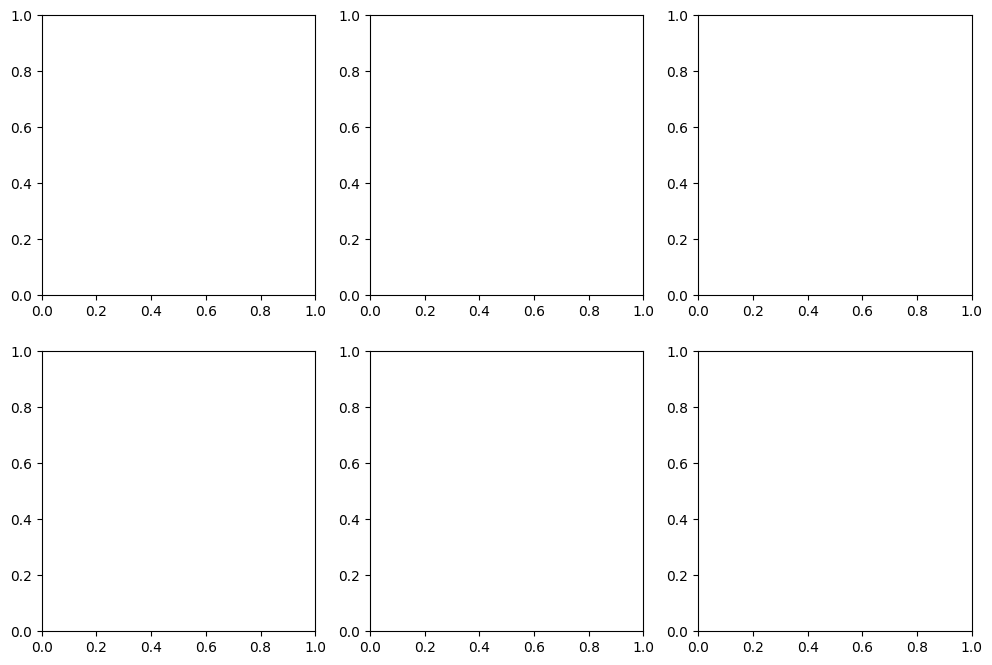

In [20]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (12,8))
axes = axes.flat

numericas = df_games.select_dtypes(include = np.number).columns

for i, col in enumerate(numericas):

    sns.boxplot(df_games[col], ax = axes[i])
    axes[i].set_title(col, fontsize = 15)

fig.tight_layout()
fig.delaxes(axes[-1]);

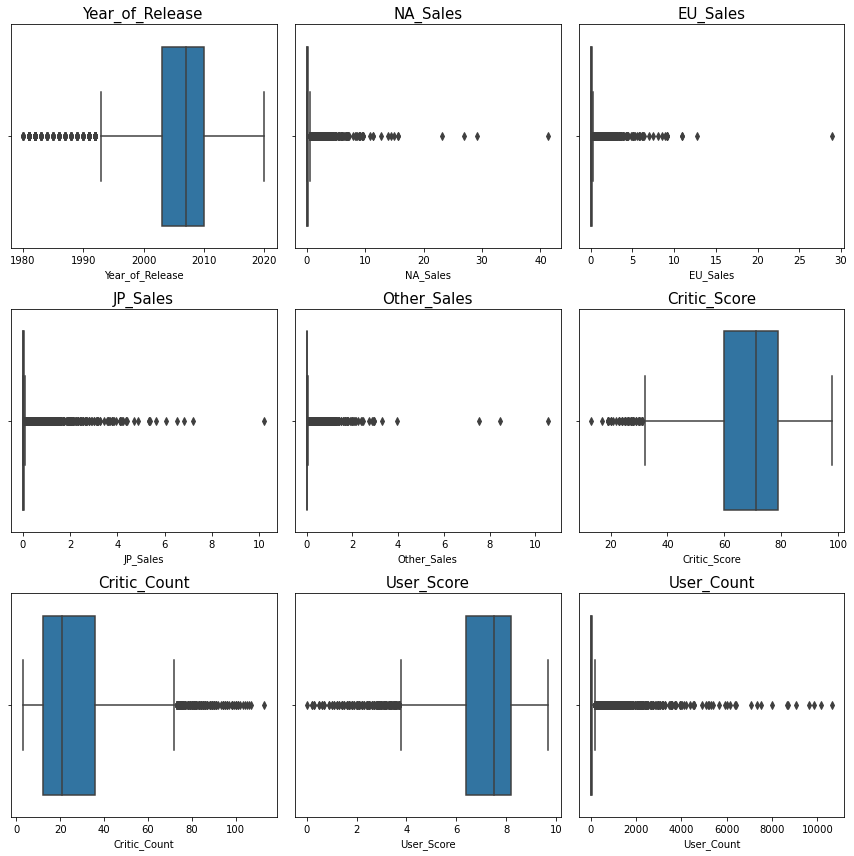

In [ ]:
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (12,12))
axes = axes.flat

for i, col in enumerate(numericas2.columns):

    sns.boxplot(df_games2[col], ax = axes[i])
    axes[i].set_title(col, fontsize = 15)

fig.tight_layout();

In [ ]:
df_games.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,825.0,2015.966061,1.298360,2013.0,2015.0,2016.00,2017.00,2020.00
North America,1034.0,0.204613,0.563471,0.0,0.0,0.02,0.12,6.18
Europe,1034.0,0.248714,0.785491,0.0,0.0,0.00,0.13,9.71
Japan,1034.0,0.033636,0.108344,0.0,0.0,0.00,0.03,2.17
Rest of World,1034.0,0.089014,0.249410,0.0,0.0,0.01,0.05,3.02


In [ ]:
df_games['Europe'].value_counts()

0.00    578
0.01     26
0.02     23
0.06     22
0.04     21
       ... 
1.60      1
1.56      1
1.50      1
2.18      1
0.93      1
Name: Europe, Length: 139, dtype: int64

In [ ]:
df_games2['JP_Sales'].value_counts()

0.00    10515
0.02      741
0.01      708
0.03      546
0.04      398
        ...  
3.14        1
2.73        1
3.18        1
3.63        1
0.97        1
Name: JP_Sales, Length: 244, dtype: int64